## Landscape for U.S. CRE: Summer 2021

### [Tim Savage](https://www.sps.nyu.edu/homepage/academics/faculty-directory/20319-timothy-h-savage.html) | NYU Schack Institute of Real Estate

#### Faculty Director | CREFC Center for Real Estate Finance

#### Faculty Coordinator | Data Analytics

#### Distinguished Fellow | NAIOP Research Foundation

#### Mentor | RERI

In [1]:
%pylab inline
from IPython.display import Image
import urllib.request as url
import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sma
import patsy
from statsmodels.graphics.api import abline_plot
import numpy.linalg as linalg
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
sns.set(context='notebook', style='whitegrid', palette='deep', font='sans-serif', font_scale=1, rc=None)

import datetime as dt
from fredapi import Fred
fred = Fred(api_key='30e6ecb242a73869e11cb35f6aa3afc3')

Populating the interactive namespace from numpy and matplotlib


## The U.S. economy and CRE
1. Empirical regularities driving the demand for real assets
2. Yield curve as a barometer of market expectations
3. The Fed and monetary policy
4. Covid-19 

### Empirical regularities

In [2]:
ten_year = fred.get_series("DGS10", observation_start='1990-01-01')
one_year = fred.get_series("DGS1", observation_start='1990-01-01')
three_month = fred.get_series("DGS3MO", observation_start='1990-01-01')

Text(0, 0.5, '%')

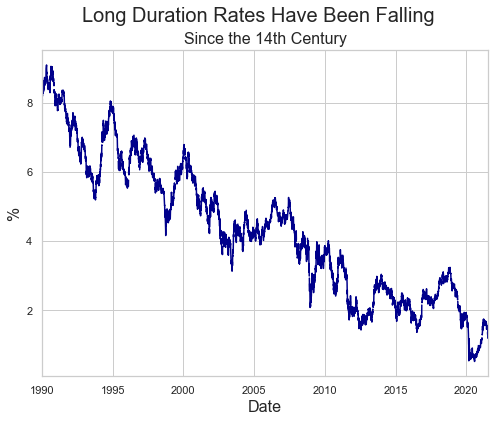

In [3]:
ten_year.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Long Duration Rates Have Been Falling', fontsize=20)
plt.title('Since the 14th Century', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)



Text(0, 0.5, '%')

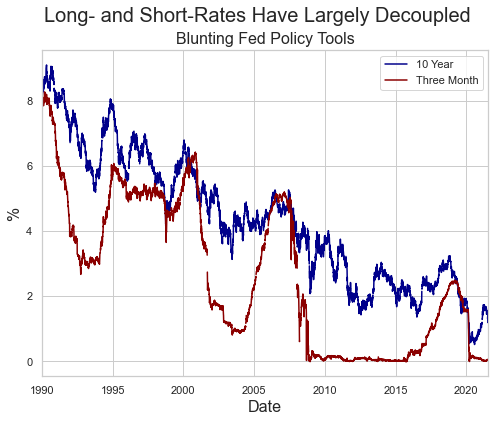

In [4]:
ten_year.plot(c='darkblue', label='10 Year', figsize=(8, 6), )
three_month.plot(color='darkred', label='Three Month')
plt.suptitle('Long- and Short-Rates Have Largely Decoupled', fontsize=20)
plt.title('Blunting Fed Policy Tools', fontsize=16)
plt.legend()
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)

In [5]:
cap_rates = pd.read_excel("cap rates.xls", index_col='Date')
cap_rates = cap_rates.drop(['GT10'], axis=1)
cap_rates = cap_rates.rename(columns={"Retail":"R", "Multifam":"M", "Indust":"I", "Office":"O"})

Text(0, 0.5, '%')

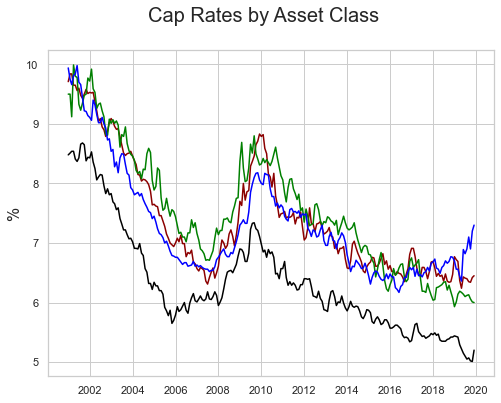

In [6]:
plt.figure(figsize = (8, 6))
plt.suptitle('Cap Rates by Asset Class', fontsize=20)
plt.plot(cap_rates['O'], label='Office', c='darkred')
plt.plot(cap_rates['I'], label='Industrial', c='green')
plt.plot(cap_rates['R'], label='Retail', c='blue')
plt.plot(cap_rates['M'], label='MF', c='black')
plt.ylabel('%', fontsize=16)

### Yield curve as a barometer

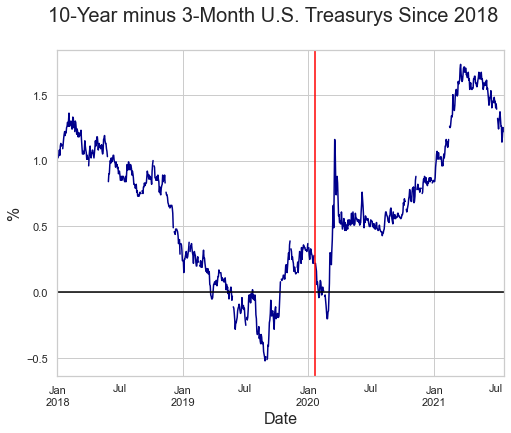

In [7]:
yield_curve = fred.get_series("T10Y3M", observation_start='2018-01-01')
yield_curve.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('10-Year minus 3-Month U.S. Treasurys Since 2018', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(0, color="black")
plt.axvline(dt.datetime(2020, 1, 19), color="red")

### Recent Fed intervention: it did not start with Covid-19

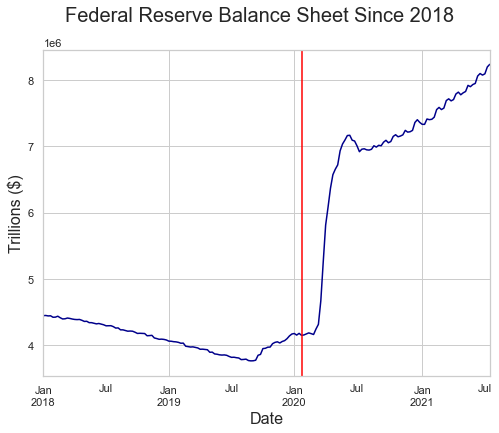

In [8]:
balance_sheet = fred.get_series("WALCL", observation_start='2018-01-01')
balance_sheet.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Federal Reserve Balance Sheet Since 2018', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Trillions ($)', fontsize=16)
plt.axvline(dt.datetime(2020, 1, 19), color="red")


### Healthy economies *do not* :
* Have negative yield curves (see Duke Professor Campbell Harvey)
* Require Fed intervention (see Global Financial Crisis)



### This occurred before covid-19 entered the lexicon



### *But the brokerages said all was well in 2019*

## CRE was faced with tech disruption before covid-19
* Aggolomeration economics driving **global urbanization** and **density**
* E-commerce driving **distributional efficiency** of goods
* Co-working driving **value of optionality** in space markets

## Is covid-19 an accelerant?
* **Office**: does WFH overwhelm aggolomeration?
* **Industrial**: Amzn broke the forecasting models, but for how long?
* **Hospitality and retail**: real-time pricing of space?
* **Data and data science**: 160 observations to help you allocation billions? 

## Covid-19 : CRE : : unanticipated infation : bond trading

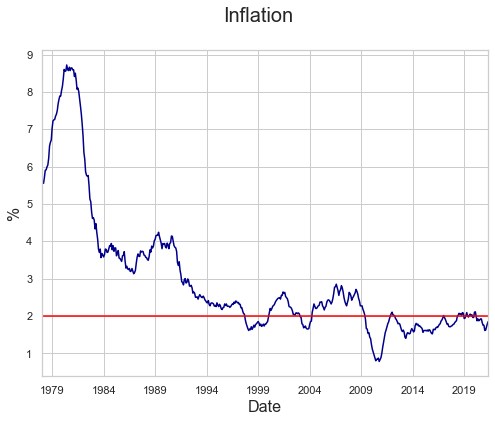

In [9]:
inflation = fred.get_series("PCETRIM12M159SFRBDAL")
inflation.plot(color='darkblue', figsize=(8, 6))
plt.suptitle('Inflation', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('%', fontsize=16)
plt.axhline(2, color="red")


## Some images: space can always be repurposed 

### Old Boat Ferry, Cambridgeshire, UK
* Mentioned in the [*Domesday Book*](https://en.wikipedia.org/wiki/Domesday_Book)
* Served alcohol for ~1500 years

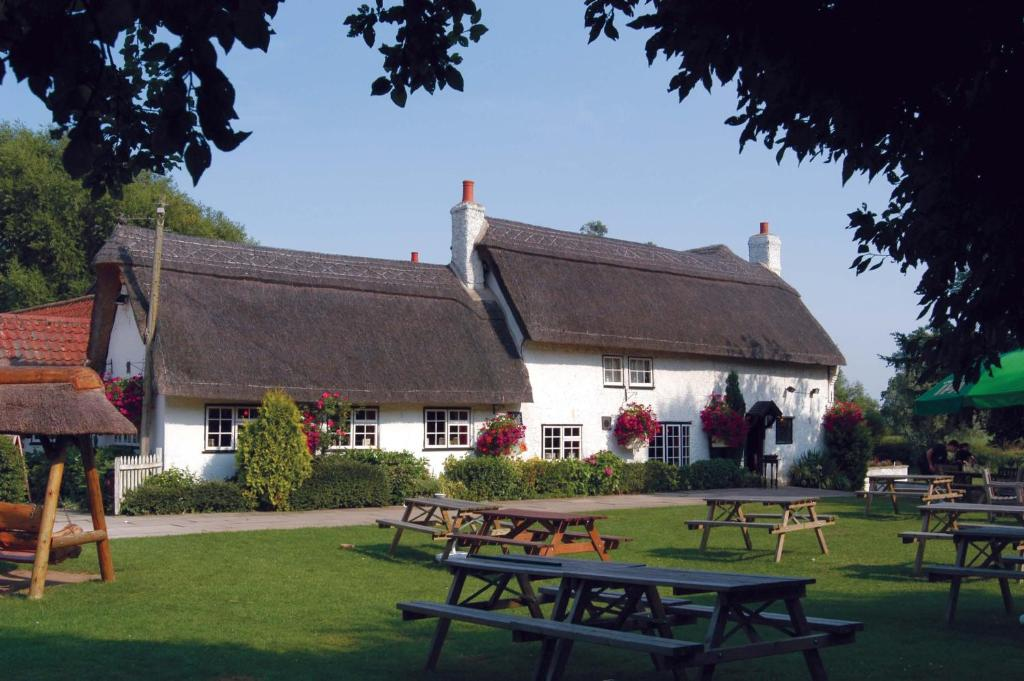

In [10]:
url = 'https://cf.bstatic.com/images/hotel/max1024x768/261/26112567.jpg'
Image(url, width=600, height=600)

### Redevelopment of NYC Grand Hyatt

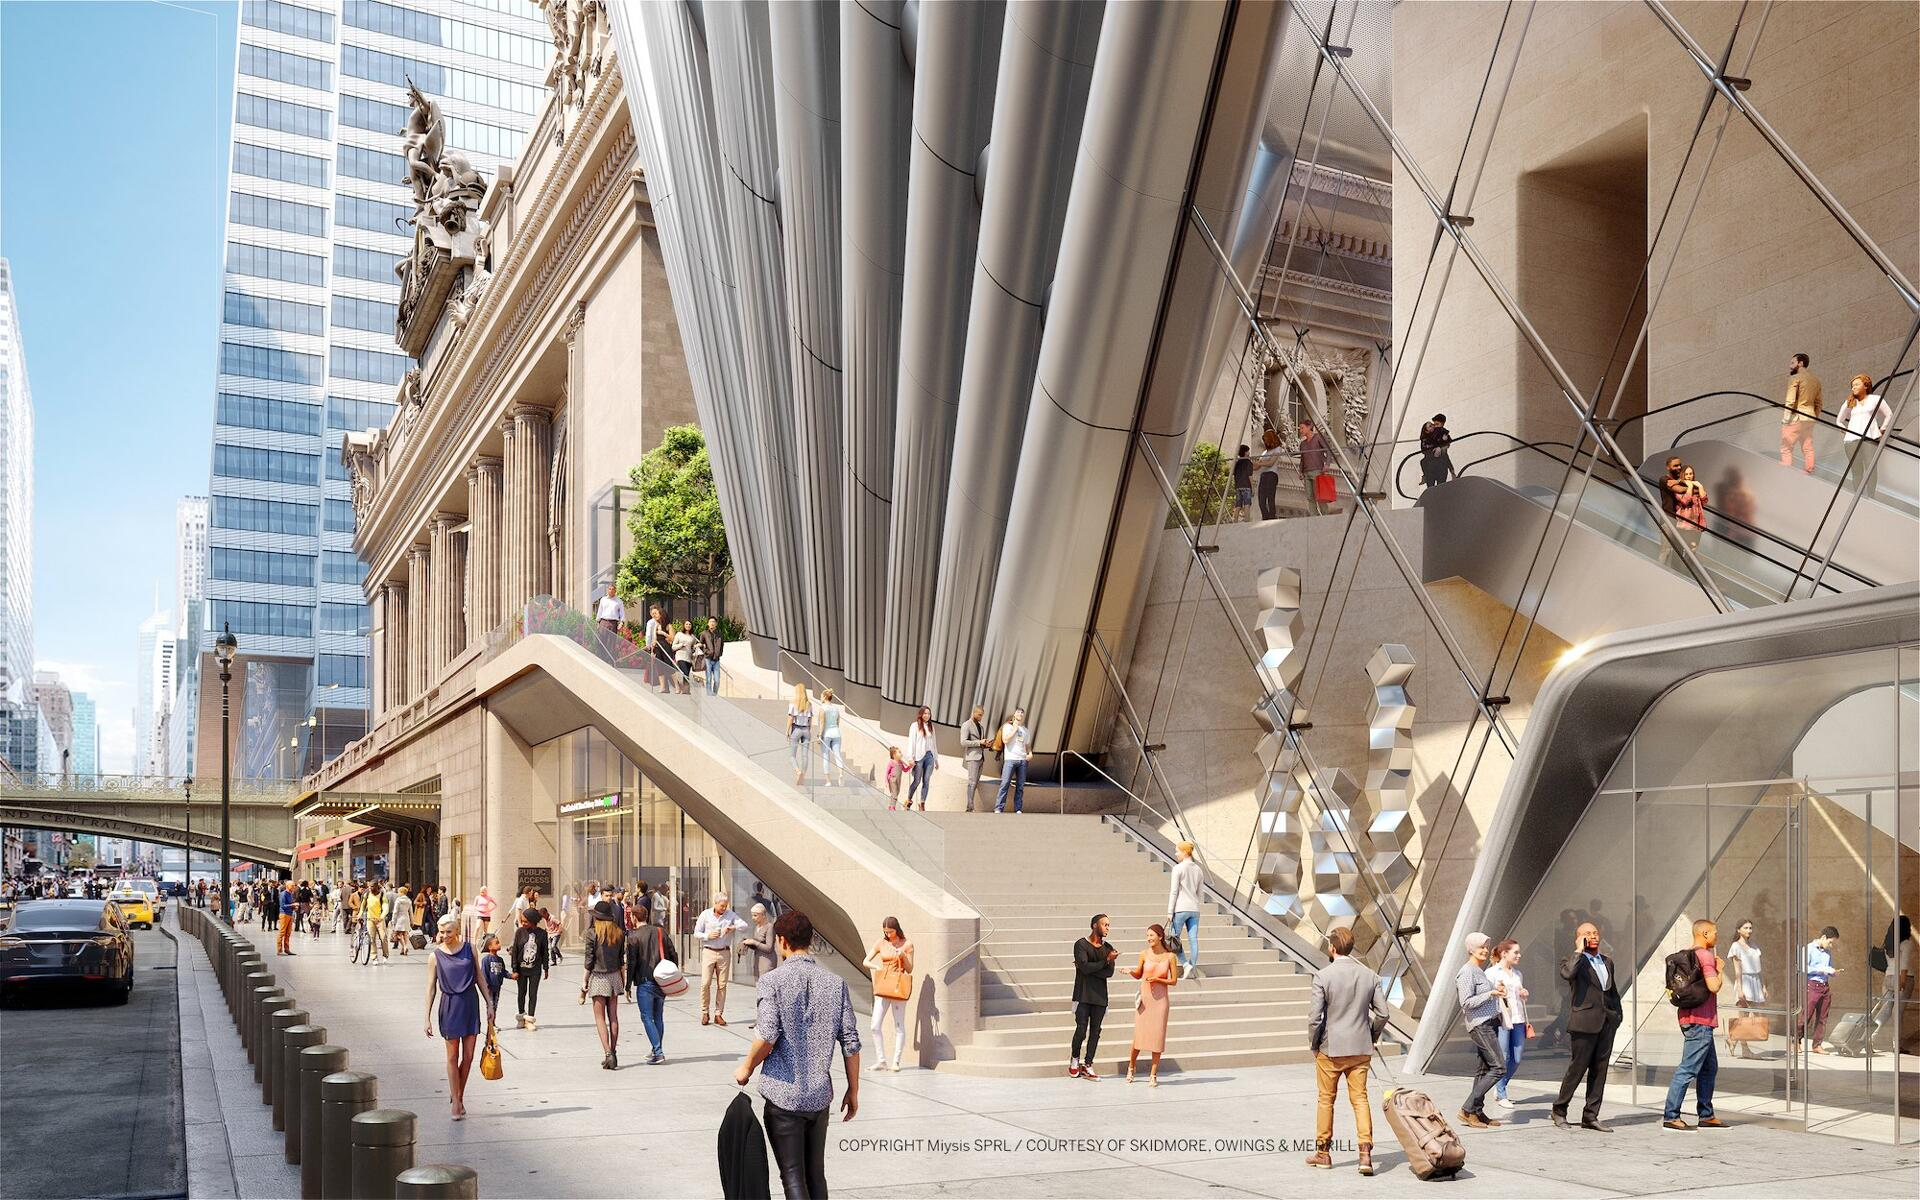

In [11]:
url = 'https://cdn.tfc.com/marketing/files/journal/SOM-175-Park-Avenue-42nd-Street-Looking-West.jpg'
Image(url, width=600, height=600)

### Thank you

### Slides: https://github.com/thsavage/Public-Presentations